<a href="https://colab.research.google.com/github/learneverythingai/Shivam-Modi-Data-Science-Analytics-Course/blob/main/Python%20Course/Python_Web_Scraping_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

workflow

1. Import libraries
2. Create response object
3. Create a Beautiful Soup object
4. Explore HTML tree
5. Extract elements of the table

In [ ]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

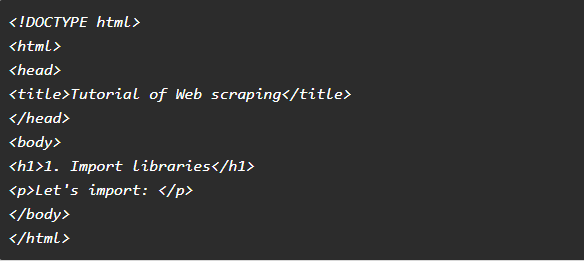

![](https://cdn-images-1.medium.com/max/1000/1*iOWLHDOtqxgngIOj9N3Hzw.png)

2. Create Response Object

In [ ]:
url='https://en.wikipedia.org/wiki/List_of_countries_by_greenhouse_gas_emissions'
req=requests.get(url)
print(req)

<Response [200]>


![](https://cdn-images-1.medium.com/max/1000/1*CToEYlptZHunIIGVQjTy_Q.png)

3. Create a Beautiful Soup object

In [ ]:
soup=BeautifulSoup(req.text,"html.parser")

In [ ]:
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of countries by greenhouse gas emissions - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"b64cb51f-5495-447c-b542-7d73638d9e48","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_greenhouse_gas_emissions","wgTitle":"List of countries by greenhouse gas emissions","wgCurRevisionId":1076518076,"wgRevisionId":1076518076,"wgArticleId":27970905,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is 

4. Explore HTML tree

In [ ]:
soup.head


<head>
<meta charset="utf-8"/>
<title>List of countries by greenhouse gas emissions - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"b64cb51f-5495-447c-b542-7d73638d9e48","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_greenhouse_gas_emissions","wgTitle":"List of countries by greenhouse gas emissions","wgCurRevisionId":1076518076,"wgRevisionId":1076518076,"wgArticleId":27970905,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Wikipedia articles in need of updating

In [ ]:
soup.body.h1

<h1 class="firstHeading mw-first-heading" id="firstHeading"><span class="mw-page-title-main">List of countries by greenhouse gas emissions</span></h1>

In [ ]:
row1=soup.find('tr')
print(row1)

<tr><td class="mbox-image"><div class="mbox-image-div"><img alt="Ambox current red Americas.svg" data-file-height="290" data-file-width="360" decoding="async" height="34" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Ambox_current_red_Americas.svg/42px-Ambox_current_red_Americas.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Ambox_current_red_Americas.svg/63px-Ambox_current_red_Americas.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/53/Ambox_current_red_Americas.svg/84px-Ambox_current_red_Americas.svg.png 2x" width="42"/></div></td><td class="mbox-text"><div class="mbox-text-span">This article needs to be <b>updated</b>. The reason given is: Consumption-based data needs updating.<span class="hide-when-compact"> Please help update this  to reflect recent events or newly available information.</span> <span class="date-container"><i>(<span class="date">February 2022</span>)</i></span></div></td></tr>


In [ ]:
rows=soup.find_all('tr')
print(len(rows))

242


In [ ]:
rows[10]

<tr>
<th scope="row"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/en/thumb/9/9e/Flag_of_Japan.svg/23px-Flag_of_Japan.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/9e/Flag_of_Japan.svg/35px-Flag_of_Japan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/9e/Flag_of_Japan.svg/45px-Flag_of_Japan.svg.png 2x" width="23"/> </span><a href="/wiki/Japan" title="Japan">Japan</a>
</th>
<td>1,155
</td>
<td>1231
</td>
<td>1310
</td>
<td>1411
</td></tr>

In [ ]:
rows = soup.find_all('tr')
cols = [t.text.rstrip() for t in rows[0].find_all('td')]
diz = {c:[] for c in cols}
print(diz)

{'': [], 'This article needs to be updated. The reason given is: Consumption-based data needs updating. Please help update this  to reflect recent events or newly available information. (February 2022)': []}
